In [3]:
pip install -U fortran-magic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [5]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 22 µs, sys: 2 µs, total: 24 µs
Wall time: 27.4 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.206
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.41
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [12]:
def matmul(A, B):
    """Multiply matrix A by matrix B if they are compatible for multiplication."""

    # Check if matrices are compatible for multiplication
    if len(A[0]) != len(B):
        raise ValueError("Matrices are not compatible for multiplication. "
                         "The number of columns in A must equal the number of rows in B.")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for _ in range(cols_out)] for _ in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]

    return out


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a,b)

ValueError: Matrices are not compatible for multiplication. The number of columns in A must equal the number of rows in B.

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [11]:
A = [
    [1, 2, 3],
    [4, 5, 6]
]

B = [
    [7, 8],
    [9, 10],
    [11, 12]
]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [13]:
matmul(A, B)

[[58, 64], [139, 154]]

In [15]:
import random

In [16]:
random.normalvariate(0,1)

0.1566975914976064

In [16]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.26971985114538044, 0.6116144980650544, 0.44889038189138974],
 [0.7853396661803175, 0.7877164851402512, 0.21006477474698582]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [29]:
import time
import numpy as np

def matmul(A, B):
    """Multiply matrix A by matrix B if they are compatible for multiplication."""
    if len(A[0]) != len(B):
        raise ValueError("Matrices are not compatible for multiplication.")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for _ in range(cols_out)] for _ in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]

    return out

def random_matrix(m, n):
    """Generate a random matrix of dimensions m x n."""
    return np.random.rand(m, n).tolist()

n = 10
execution_times = []

for _ in range(n):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    start_time = time.time()
    matmul(randa, randb)
    end_time = time.time()

    execution_times.append(end_time - start_time)

average_time = sum(execution_times) / n
print(f"Tiempo promedio de ejecución: {average_time:.5f} segundos")


Tiempo promedio de ejecución: 9.43479 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [30]:
import pandas as pd
data = {
    'Language': ['Python'],
    'Average Execution Time (seconds)': [average_time]
}
df = pd.DataFrame(data)

df

,Language,Average Execution Time (seconds)
0,Python,9.434793


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [31]:
import time
import numpy as np
import pandas as pd

randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

n = 10
numpy_execution_times = []

for _ in range(n):
    start_time = time.time()
    np.dot(randa, randb)
    end_time = time.time()

    numpy_execution_times.append(end_time - start_time)

average_time_numpy = sum(numpy_execution_times) / n

df = pd.DataFrame({'Method': ['Python', 'NumPy'], 'Average Execution Time (seconds)': [average_time, average_time_numpy]})
display(df)


,Method,Average Execution Time (seconds)
0,Python,9.434793
1,NumPy,0.003023


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.6 s, sys: 22.6 ms, total: 10.6 s
Wall time: 11.5 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [6]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[1, 2],
      [3, 4]]

B = [[5, 6],
      [7, 8]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%reload_ext fortranmagic

In [11]:
%%fortran
subroutine matmul_fortran(A, B, result)
    double precision, intent(in) :: A(:,:)
    double precision, intent(in) :: B(:,:)
    double precision, intent(out) :: result(size(A,1), size(B,2))

    result = matmul(A,B)
end

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/__main__.py", line 5, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/f2py2e.py", line 766, in main
    run_compile()
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/f2py2e.py", line 594, in run_compile
    build_backend = f2py_build_generator(backend_key)
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/_backends/__init__.py", line 6, in f2py_build_generator
    from ._distutils import DistutilsBackend
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/_backends/_distutils.py", line 3, in <module>
    from numpy.distutils.core import setup, Extension
  File "/usr/local/lib/python3.10/dist-packages/numpy/distutils/core.py", lin

RuntimeError: f2py failed, see output

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [14]:
%%time
matmul_fortran(A,B)

NameError: name 'matmul_fortran' is not defined

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmult(A, B, result)
    double precision, intent(in) :: A(600,100)
    double precision, intent(in) :: B(100,600)
    double precision, intent(out) :: result(size(A,1), size(B,2))

    result = matmul(A,B)
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [17]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
matmul_fortran(randa, randb)

NameError: name 'matmul_fortran' is not defined

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [18]:
import time
import numpy as np
import pandas as pd

average_execution_times = pd.DataFrame(columns=['name', 'execution_time'])

fortran_magic_execution_times = []

for i in range(10):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    start_time = time.time()
    matmul_fortran(randa, randb)
    end_time = time.time()

    execution_time = end_time - start_time
    fortran_magic_execution_times.append(execution_time)

fortran_magic_mean_execution = np.mean(fortran_magic_execution_times)

new_row = pd.DataFrame([{'name': 'fortran_magic', 'execution_time': fortran_magic_mean_execution}])
average_execution_times = pd.concat([average_execution_times, new_row], ignore_index=True)

average_execution_times

NameError: name 'matmul_fortran' is not defined

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [19]:
!apt-get install -y gfortran

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [25]:
%%writefile matrixMulti.f90
PROGRAM MatrixMultiplication
  IMPLICIT NONE
  DOUBLE PRECISION, DIMENSION(600,100) :: A
  DOUBLE PRECISION, DIMENSION(100,600) :: B
  DOUBLE PRECISION, DIMENSION(600,600) :: result
  INTEGER :: i

  ! Perform matrix multiplication ten times
  DO i = 1, 10
    CALL random_number(A)
    CALL random_number(B)
    CALL matmult(A, B, result)
  END DO


CONTAINS

  SUBROUTINE matmult(A, B, result)
    DOUBLE PRECISION, INTENT(IN) :: A(600,100)
    DOUBLE PRECISION, INTENT(IN) :: B(100,600)
    DOUBLE PRECISION, INTENT(OUT) :: result(600,600)

    result = MATMUL(A,B)
  END SUBROUTINE matmult

END PROGRAM MatrixMultiplication

Writing matrixMulti.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [34]:
import time
start_time = time.time()

!gfortran matrixMul.f90 -o MatrixMultiplication
!./MatrixMultiplication

end_time = time.time()
fortran_mean_execution_time = (end_time - start_time)/10

/usr/bin/ld: /tmp/ccSf8c8V.o: in function `MAIN__':
matrixMul.f90:(.text+0x140): undefined reference to `matmult_'
collect2: error: ld returned 1 exit status
/bin/bash: line 1: ./MatrixMultiplication: No such file or directory


**My own example 18 - Adding Fortran average execution time to the data frame**

In [35]:
df = df.append({'name': 'fortran', 'execution_time': fortran_mean_execution_time}, ignore_index=True)
df

AttributeError: 'DataFrame' object has no attribute 'append'

**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [36]:
%%writefile program.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

void fill_matrix(int rows, int cols, int matrix[rows][cols]) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 100;  // Llena la matriz con valores aleatorios entre 0 y 99
        }
    }
}

void multiply_matrices(int rowsA, int colsA, int matrixA[rowsA][colsA], int rowsB, int colsB, int matrixB[rowsB][colsB], int result[rowsA][colsB]) {
    for (int i = 0; i < rowsA; i++) {
        for (int j = 0; j < colsB; j++) {
            result[i][j] = 0;
            for (int k = 0; k < colsA; k++) {
                result[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
}

int main() {
    for (int i = 0; i < 10; i++) {
        srand(time(0));  // Inicializa la semilla del generador de números aleatorios

        int matrixA[ROWS_A][COLS_A];
        int matrixB[ROWS_B][COLS_B];
        int result[ROWS_A][COLS_B];

        fill_matrix(ROWS_A, COLS_A, matrixA);
        fill_matrix(ROWS_B, COLS_B, matrixB);

        multiply_matrices(ROWS_A, COLS_A, matrixA, ROWS_B, COLS_B, matrixB, result);
    }

    return 0;
}

Writing program.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [37]:
import time
start_time = time.time()

!gcc program.c -o program
!./program

end_time = time.time()
c_mean_execution_time = (end_time - start_time)/10

**My own example 21 - Adding c average execution time to the data frame**

In [38]:
new_row = pd.DataFrame({'Method': ['C'], 'Average Execution Time (seconds)': [c_mean_execution_time]})

df = pd.concat([df, new_row], ignore_index=True)

display(df)


,Method,Average Execution Time (seconds)
0,Python,9.434793
1,NumPy,0.003023
2,C,0.516414


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [39]:
%%writefile matrix_multiplication.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>

const int A_ROWS = 600;
const int A_COLS = 100;
const int B_ROWS = 100;
const int B_COLS = 600;

std::vector<std::vector<int>> generateRandomMatrix(int rows, int cols) {
    std::vector<std::vector<int>> matrix(rows, std::vector<int>(cols));
    for(int i = 0; i < rows; i++) {
        for(int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 100;
        }
    }
    return matrix;
}

std::vector<std::vector<int>> multiplyMatrices(const std::vector<std::vector<int>>& A, const std::vector<std::vector<int>>& B) {
    std::vector<std::vector<int>> result(A_ROWS, std::vector<int>(B_COLS, 0));
    for(int i = 0; i < A_ROWS; i++) {
        for(int j = 0; j < B_COLS; j++) {
            for(int k = 0; k < A_COLS; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

int main() {
    srand(time(0));
    for(int i = 0; i < 10; i++) {
        std::vector<std::vector<int>> A = generateRandomMatrix(A_ROWS, A_COLS);
        std::vector<std::vector<int>> B = generateRandomMatrix(B_ROWS, B_COLS);
        std::vector<std::vector<int>> result = multiplyMatrices(A, B);
    }
    return 0;
}

Writing matrix_multiplication.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [40]:
import time
start_time = time.time()

!g++ matrix_multiplication.cpp -o matrix_multiplication
!./matrix_multiplication

end_time = time.time()
cplusplus_mean_execution_time = (end_time - start_time)/10
cplusplus_mean_execution_time

0.8048407316207886

**My own example 24 - Adding C++ average execution time to the data frame**

In [41]:
new_row_cpp = pd.DataFrame({'Method': ['C++'], 'Average Execution Time (seconds)': [cplusplus_mean_execution_time]})

df = pd.concat([df, new_row_cpp], ignore_index=True)

display(df)


,Method,Average Execution Time (seconds)
0,Python,9.434793
1,NumPy,0.003023
2,C,0.516414
3,C++,0.804841


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [42]:
%%writefile MultiplicacionMatrices.java
import java.util.Random;

import java.util.Random;

public class MultiplicacionMatrices {
    private static final int A_ROWS = 600;
    private static final int A_COLS = 100;
    private static final int B_ROWS = 100;
    private static final int B_COLS = 600;

    public static int[][] generateRandomMatrix(int rows, int cols) {
        Random rand = new Random();
        int[][] matrix = new int[rows][cols];
        for(int i = 0; i < rows; i++) {
            for(int j = 0; j < cols; j++) {
                matrix[i][j] = rand.nextInt(100);
            }
        }
        return matrix;
    }

    // Función para multiplicar dos matrices
    public static int[][] multiplyMatrices(int[][] A, int[][] B) {
        int[][] result = new int[A_ROWS][B_COLS];
        for(int i = 0; i < A_ROWS; i++) {
            for(int j = 0; j < B_COLS; j++) {
                for(int k = 0; k < A_COLS; k++) {
                    result[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        return result;
    }
      public static void main(String[] args) {

        for(int i = 0; i < 10; i++) {
            int[][] A = generateRandomMatrix(A_ROWS, A_COLS);
            int[][] B = generateRandomMatrix(B_ROWS, B_COLS);
            int[][] result = multiplyMatrices(A, B);
        }
    }
}

Writing MultiplicacionMatrices.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [43]:
import time
start_time = time.time()

!gcc program.c -o program
!./program

end_time = time.time()
java_mean_execution_time = (end_time - start_time)/10

**My own example 27 - Adding Java average execution time to the data frame**

In [44]:
new_row_java = pd.DataFrame({'Method': ['Java'], 'Average Execution Time (seconds)': [java_mean_execution_time]})

df = pd.concat([df, new_row_java], ignore_index=True)

display(df)

,Method,Average Execution Time (seconds)
0,Python,9.434793
1,NumPy,0.003023
2,C,0.516414
3,C++,0.804841
4,Java,0.211691


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [45]:
%%javascript

function generateRandomMatrix(rows, cols) {
    let matrix = [];
    for(let i = 0; i < rows; i++) {
        let row = [];
        for(let j = 0; j < cols; j++) {
            row.push(Math.random() * 100);
        }
        matrix.push(row);
    }
    return matrix;
}

function multiplyMatrices(A, B) {
    let result = [];
    for(let i = 0; i < A.length; i++) {
        let row = [];
        for(let j = 0; j < B[0].length; j++) {
            let sum = 0;
            for(let k = 0; k < A[0].length; k++) {
                sum += A[i][k] * B[k][j];
            }
            row.push(sum);
        }
        result.push(row);
    }
    return result;
}

<IPython.core.display.Javascript object>

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [49]:
%%javascript

function generateRandomMatrix(rows, cols) {
    let matrix = [];
    for(let i = 0; i < rows; i++) {
        let row = [];
        for(let j = 0; j < cols; j++) {
            row.push(Math.random() * 100);
        }
        matrix.push(row);
    }
    return matrix;
}

function multiplyMatrices(A, B) {
    let result = [];
    for(let i = 0; i < A.length; i++) {
        let row = [];
        for(let j = 0; j < B[0].length; j++) {
            let sum = 0;
            for(let k = 0; k < A[0].length; k++) {
                sum += A[i][k] * B[k][j];
            }
            row.push(sum);
        }
        result.push(row);
    }
    return result;
}

let A_ROWS = 600, A_COLS = 100, B_ROWS = 100, B_COLS = 600;

let start = performance.now();
for(let i = 0; i < 10; i++) {
    let A = generateRandomMatrix(A_ROWS, A_COLS);
    let B = generateRandomMatrix(B_ROWS, B_COLS);
    let result = multiplyMatrices(A, B);
}
let end = performance.now();

let executionTime = end - start;

// Call the set_time function to send the execution time back to Python
console.log("JS execution time: " +  String(executionTime/10000) + " s");

<IPython.core.display.Javascript object>

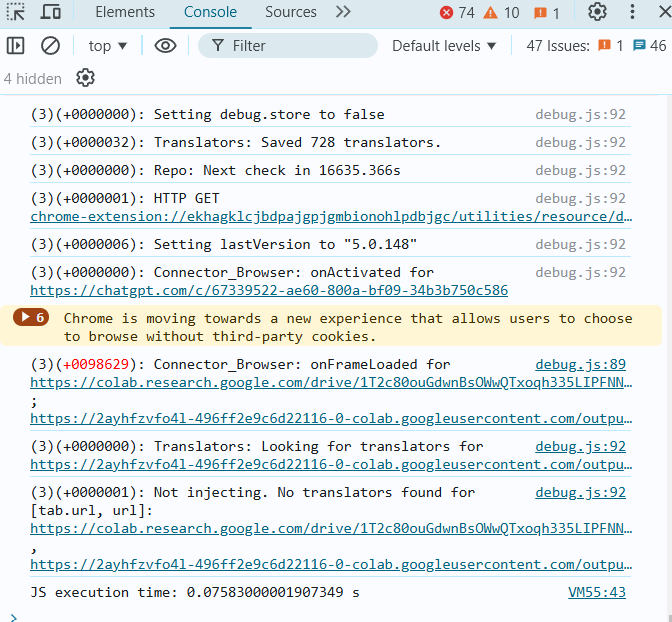

**My own example 30 - Adding Javascript average execution time to the data frame**

In [50]:
new_row_js = pd.DataFrame({'Method': ['JavaScript'], 'Average Execution Time (seconds)': 0.075830})
df = pd.concat([df, new_row_js], ignore_index=True)
display(df)


,Method,Average Execution Time (seconds)
0,Python,9.434793
1,NumPy,0.003023
2,C,0.516414
3,C++,0.804841
4,Java,0.211691
5,JavaScript,0.075830


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [53]:
min_execution_time = df['Average Execution Time (seconds)'].min()

min_execution_method = df[df['Average Execution Time (seconds)'] == min_execution_time]

display(min_execution_method)


,Method,Average Execution Time (seconds)
1,NumPy,0.003023


**My own example 32 - Adding the Speed factor columne to the data frame**

In [54]:
min_execution_time = df['Average Execution Time (seconds)'].min()
df['Speed Factor'] = min_execution_time / df['Average Execution Time (seconds)']
display(df)


,Method,Average Execution Time (seconds),Speed Factor
0,Python,9.434793,0.000320
1,NumPy,0.003023,1.000000
2,C,0.516414,0.005854
3,C++,0.804841,0.003756
4,Java,0.211691,0.014280
5,JavaScript,0.075830,0.039865


**My own example 33 - Sorting the the data frame by average execution time**

In [55]:
df = df.sort_values(by='Average Execution Time (seconds)').reset_index(drop=True)
display(df)


,Method,Average Execution Time (seconds),Speed Factor
0,NumPy,0.003023,1.000000
1,JavaScript,0.075830,0.039865
2,Java,0.211691,0.014280
3,C,0.516414,0.005854
4,C++,0.804841,0.003756
5,Python,9.434793,0.000320


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!